# DATA GATHERING AND EDA

In [2]:
    #import the packages that I will need for the projects
import pandas as pd
import pyreadstat as prs #in order to read SPSS files
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from mpl_toolkits import mplot3d

In [3]:
    #read the data - the data is in SPSS format
df, meta = prs.read_sav('W35_May18/ATP W35.sav')

In [4]:
    #Check the data
print(df.shape)
df.head()

(4594, 190)


,QKEY,Device_Type_W35,LANGUAGE_W35,FORM_W35,ALG1_W35,ECIMPA_W35,ECIMPB_W35,ECIMPC_W35,ECIMPD_W35,ECIMPE_W35,...,F_PARTY_FINAL,F_PARTYLN_FINAL,F_PARTYSUM_FINAL,F_INCOME_FINAL,F_INCOME_RECODE_FINAL,F_REG_FINAL,F_IDEO_FINAL,F_INTUSER_FINAL,F_VOLSUM_FINAL,WEIGHT_W35
0,100197.0,2.0,9.0,1.0,1.0,3.0,1.0,2.0,1.0,NaN,...,2.0,NaN,2.0,3.0,3.0,1.0,3.0,1.0,1.0,0.295954
1,100260.0,2.0,9.0,2.0,2.0,NaN,NaN,NaN,NaN,3.0,...,1.0,NaN,1.0,6.0,2.0,1.0,1.0,1.0,2.0,0.414951
2,100314.0,1.0,9.0,1.0,2.0,1.0,2.0,1.0,1.0,NaN,...,1.0,NaN,1.0,4.0,2.0,1.0,2.0,1.0,1.0,0.187774
3,100363.0,1.0,9.0,1.0,1.0,3.0,1.0,1.0,1.0,NaN,...,2.0,NaN,2.0,8.0,1.0,1.0,3.0,1.0,2.0,1.205720
4,100446.0,3.0,9.0,1.0,2.0,1.0,1.0,2.0,1.0,NaN,...,2.0,NaN,2.0,7.0,1.0,1.0,4.0,1.0,1.0,0.110696


In [5]:
len(df)

4594

In [6]:
col = list(df.columns)
col

['QKEY',
 'Device_Type_W35',
 'LANGUAGE_W35',
 'FORM_W35',
 'ALG1_W35',
 'ECIMPA_W35',
 'ECIMPB_W35',
 'ECIMPC_W35',
 'ECIMPD_W35',
 'ECIMPE_W35',
 'ECIMPF_W35',
 'ECIMPG_W35',
 'ECIMPH_W35',
 'TC2A_W35',
 'TC2B_W35',
 'TC2C_W35',
 'TC3A_W35',
 'TC3B_W35',
 'TC3C_W35',
 'TC4_W35',
 'TC5_W35',
 'TC6A_W35',
 'TC6B_W35',
 'SNSA_W35',
 'SNSB_W35',
 'SNSE_W35',
 'SNSH_W35',
 'SNSJ_W35',
 'SNSL_W35',
 'SNSUSER_W35',
 'SNSFRA_W35',
 'SNSFRB_W35',
 'SM1A_W35',
 'SM1B_W35',
 'SM1C_W35',
 'SM1D_W35',
 'SM1E_W35',
 'SM1F_W35',
 'SM2A_W35',
 'SM2B_W35',
 'SM2C_W35',
 'SM2D_W35',
 'SM3_W35',
 'SM4A_W35',
 'SM4B_W35',
 'SM4C_W35',
 'SM4D_W35',
 'SM5A_W35',
 'SM5B_W35',
 'SM5C_W35',
 'SM5D_W35',
 'SM6A_W35',
 'SM6B_W35',
 'SM7_W35',
 'SM8A_W35',
 'SM8B_W35',
 'SM8C_W35',
 'SM9A_W35',
 'SM9B_W35',
 'SM9C_W35',
 'SM9D_W35',
 'SM9E_W35',
 'SM10A_W35',
 'SM10B_W35',
 'SM10C_W35',
 'SM10D_W35',
 'SM10E_W35',
 'SM11_W35',
 'SM12A_W35',
 'SM12B_W35',
 'SM12C_W35',
 'SM13A_W35',
 'SM13B_W35',
 'SM13C_W35',
 

In [7]:
len(col)

190

In [8]:
#Check the target variables for eventual class imbalance
df.ALG1_W35.value_counts()

2.0     2790
1.0     1713
99.0      91
Name: ALG1_W35, dtype: int64

In [9]:
#remove the non answer
df = df[df.ALG1_W35 != 99]

In [10]:
df.ALG1_W35.value_counts()

2.0    2790
1.0    1713
Name: ALG1_W35, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4503 entries, 0 to 4593
Columns: 190 entries, QKEY to WEIGHT_W35
dtypes: float64(190)
memory usage: 6.6 MB


In [12]:
target = df.ALG1_W35

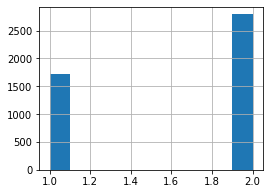

In [13]:
target.hist(figsize=(4,3))
plt.show()

In [14]:
pd.DataFrame(df.isna().sum())

,0
QKEY,0
Device_Type_W35,0
LANGUAGE_W35,0
FORM_W35,0
ALG1_W35,0
ECIMPA_W35,2245
ECIMPB_W35,2245
ECIMPC_W35,2245
ECIMPD_W35,2245
ECIMPE_W35,2258


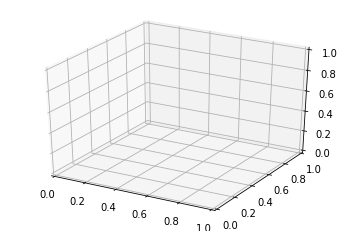

In [15]:
fig = plt.figure()
ax = plt.axes(projection='3d')

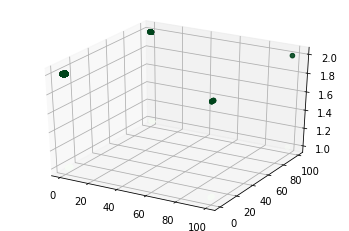

In [17]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = target
xdata = df.SM10A_W35
ydata = df.F_INCOME_RECODE_FINAL
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');